### Import useful modules

In [1]:
import pandas as pd # dataframes
import numpy as np # numerical library
import seaborn as sns # advanced plotting library
from matplotlib import pyplot as plt # plotting library
%matplotlib inline
# need this in order to display plots in notebook

### Load data 

Only pull in entire train data set once

Focus on store 25

In [2]:
DATA_PATH = '/root/src/data/'

In [3]:
import os
FILE = './df_train_store25.pkl'
if not os.path.exists(FILE):
    df_train = pd.read_csv(DATA_PATH + 'train.csv', parse_dates=['date'], dtype={'id':np.uint32, 'store_nbr':np.uint32, 'item_nbr': np.uint32, 'onpromotion': np.bool, 'unit_sales': np.float32})
    df_train_store25 = df_train[df_train['store_nbr'] == 25]
    df_train_store25.to_pickle(FILE)
    del df_train # delete reference so its the GCs problem now
    del df_train_store25 # delete reference so its the GCs problem now

### What does the data look like?

In [4]:
df_train = pd.read_pickle(FILE)
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


### Nulls in data?

In [5]:
print("Nulls in columns: {0} => {1}".format(df_train.columns.values, df_train.isnull().any().values))

Nulls in columns: ['id' 'date' 'store_nbr' 'item_nbr' 'unit_sales' 'onpromotion'] => [False False False False False  True]


In [6]:
def assess_missing_values(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count())
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [7]:
assess_missing_values(df_train)

,Total,Percent
id,0,0.000000
date,0,0.000000
store_nbr,0,0.000000
item_nbr,0,0.000000
unit_sales,0,0.000000
onpromotion,412459,0.200513


### 20% are nulls. Lets remove them for now

In [8]:
df_train = df_train.dropna()

In [9]:
def allValuesInDFAreZero(df, item):
    return assess_missing_values(df).sum().sum()==item
print("successfully removed?", allValuesInDFAreZero(df_train, 0))

successfully removed? True


# Cool, so we have a training set for store 25 with zero Nans

In [10]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
21680481,21680481,2014-04-01,25,103665,1.0,False
21680482,21680482,2014-04-01,25,105574,7.0,False
21680483,21680483,2014-04-01,25,105693,1.0,False
21680484,21680484,2014-04-01,25,105737,12.0,False
21680485,21680485,2014-04-01,25,108786,1.0,False


In [11]:
print("Number of items:", len(df_train['item_nbr'].unique()))

Number of items: 3506


# This store deals with 3506 different items

In [12]:
df_train.groupby('item_nbr').count()['id'].sort_values(ascending=False).head()

item_nbr
1146496    1164
364606     1164
305229     1163
314384     1163
311994     1162
Name: id, dtype: int64

# To make life easy, let's focus on a single popular item for now; 1146496

In [13]:
df_train_item1146496 = df_train[df_train['item_nbr'] == 1146496]
df_train_item1146496 = df_train_item1146496.set_index(df_train_item1146496['date'])
del df_train_item1146496['date']
del df_train_item1146496['item_nbr']
del df_train_item1146496['store_nbr']
df_train_item1146496.head()

,id,unit_sales,onpromotion
date,,,
2014-04-01,21681311,52.0,False
2014-04-02,21732706,46.0,False
2014-04-03,21783144,98.0,False
2014-04-04,21833083,223.0,False
2014-04-05,21884793,601.0,False


### The next few lines of code check whether or not we need the id column and/or onpromotion column

In [14]:
# Does id add extra info? Looks the same as date. Lets check:
print("Should remove id as well: ", len(df_train_item1146496['id'].unique()) == df_train_item1146496['id'].count())

Should remove id as well:  True


In [15]:
del df_train_item1146496['id']

In [16]:
df_train_item1146496.head()

,unit_sales,onpromotion
date,,
2014-04-01,52.0,False
2014-04-02,46.0,False
2014-04-03,98.0,False
2014-04-04,223.0,False
2014-04-05,601.0,False


In [17]:
def assess_onpromotion(df):
    return (len(df[df['onpromotion'] == True].values))/len(df.values)
print("Number of days the item has been on promotion:", int(assess_onpromotion(df_train_item1146496)))

Number of days the item has been on promotion: 0


In [18]:
del df_train_item1146496['onpromotion']

### Turns out we dont need those two columns either

In [19]:
df_train_item1146496.head()

,unit_sales
date,
2014-04-01,52.0
2014-04-02,46.0
2014-04-03,98.0
2014-04-04,223.0
2014-04-05,601.0


# So save what we have and inspect unit sales

In [20]:
# save the dataframe to disk
df_train_item1146496.to_pickle('./df_train_item1146496_store25.pkl')

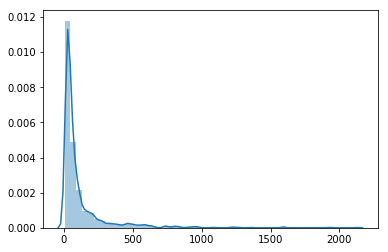

In [21]:
sns.distplot(df_train_item1146496);

In [22]:
def plot_time_period(df, start, end):
    time_between(df, start, end).plot(kind='bar')

In [23]:
def time_between(df, start, end):
    time_period = (df.index >= start) & (df.index <= end)
    df = df[time_period]
    df.columns = [start]
    return df

### Look at unit sales for each year

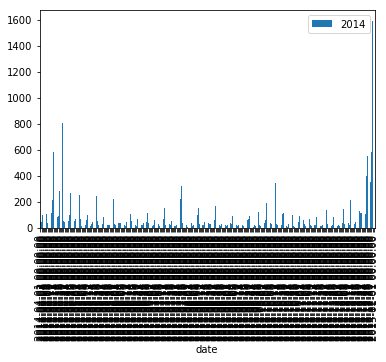

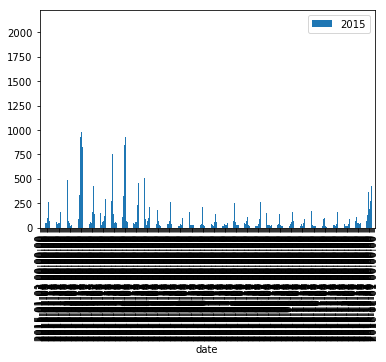

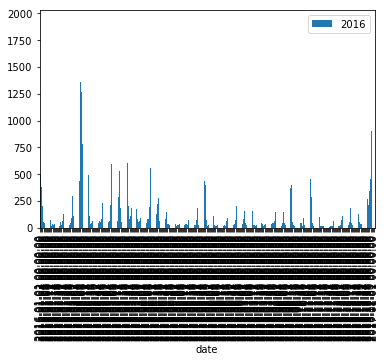

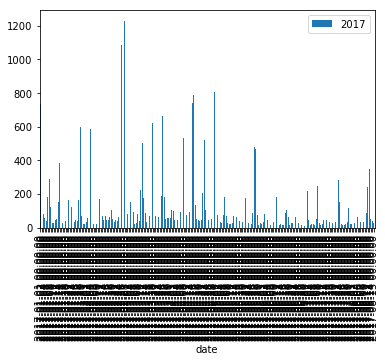

In [24]:
plot_time_period(df_train_item1146496, '2014', '2015')
plot_time_period(df_train_item1146496, '2015', '2016')
plot_time_period(df_train_item1146496, '2016', '2017')
plot_time_period(df_train_item1146496, '2017', '2018')

### Look at unit sales per month

In [25]:
df_train_item1146496['day'] = df_train_item1146496.index.to_series().dt.strftime('%d');
df_train_item1146496['month'] = df_train_item1146496.index.to_series().dt.strftime('%b');
df_train_item1146496['year'] = df_train_item1146496.index.to_series().dt.strftime('%y');

In [26]:
df = df_train_item1146496.groupby(['month', 'day']).mean()
df.columns = ['mean']
df['median'] = df_train_item1146496.groupby(['month', 'day']).median()['unit_sales']

In [27]:
df['2014'] = df_train_item1146496[df_train_item1146496['year']=='14'].groupby(['month', 'day']).sum()['unit_sales']
df['2015'] = df_train_item1146496[df_train_item1146496['year']=='15'].groupby(['month', 'day']).sum()['unit_sales']
df['2016'] = df_train_item1146496[df_train_item1146496['year']=='16'].groupby(['month', 'day']).sum()['unit_sales']
df['2017'] = df_train_item1146496[df_train_item1146496['year']=='17'].groupby(['month', 'day']).sum()['unit_sales']

In [28]:
def plot_time_against_mean_and_median(df, month):
    ax = df.loc[month].plot(kind='bar')
    lines, labels = ax.get_legend_handles_labels()
    ax.set_title(month)
    ax.legend(lines, labels)

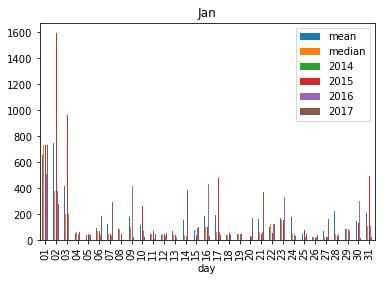

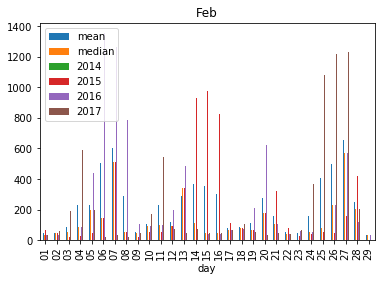

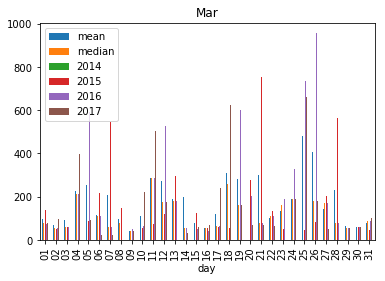

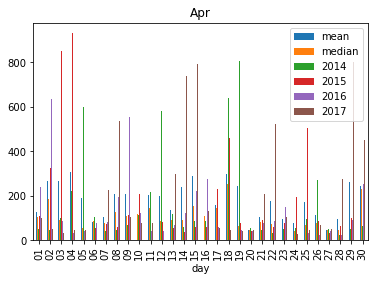

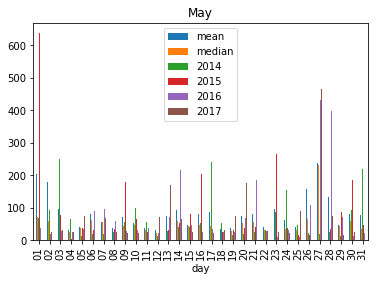

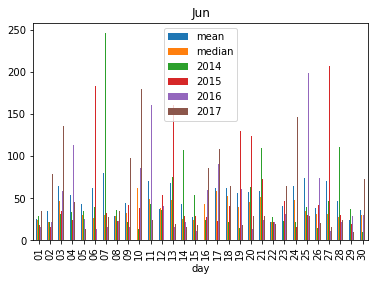

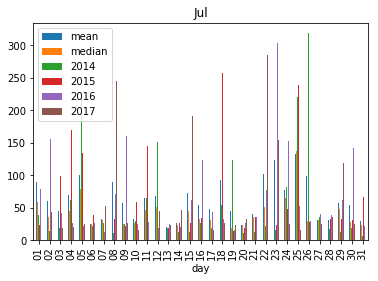

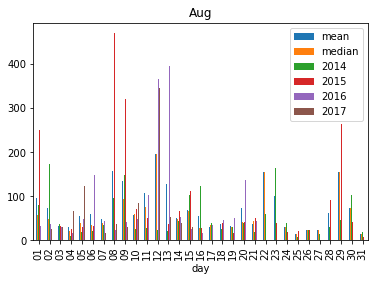

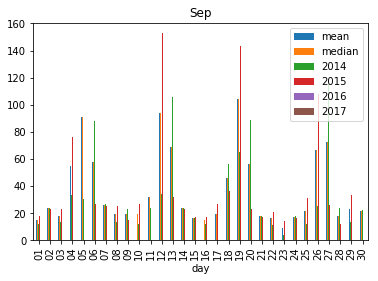

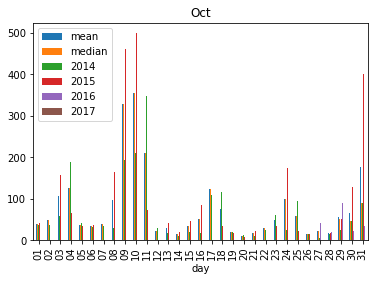

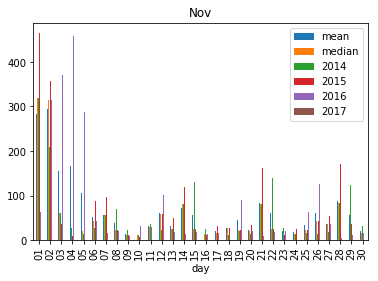

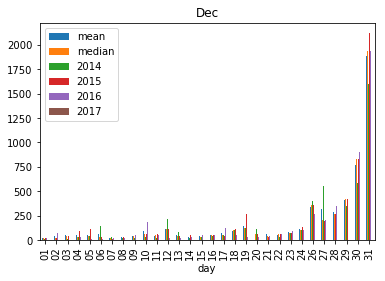

In [29]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in months:
    plot_time_against_mean_and_median(df, month)